In [76]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [77]:
iris= load_iris()
type(iris)

sklearn.utils.Bunch

In [78]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [79]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [80]:
x= iris.data
y= iris.target

df= pd.DataFrame(x, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [81]:
new_df = df.copy()

In [82]:
new_df['class'] = y
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


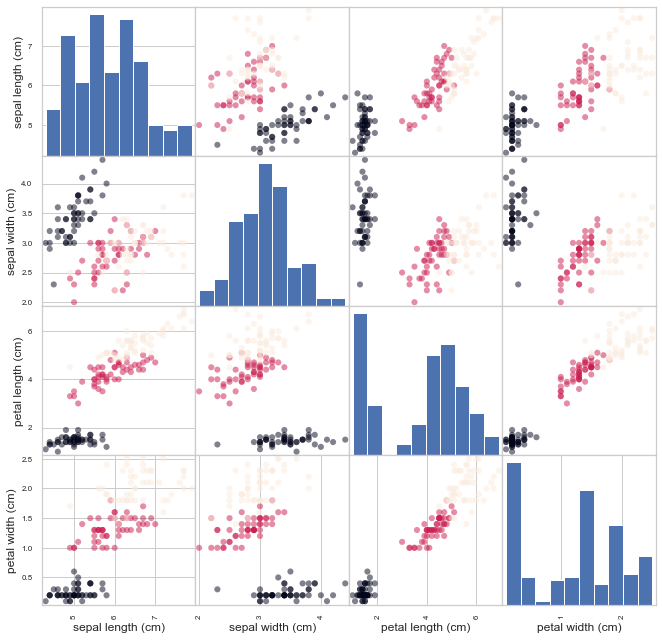

In [83]:
matrix_scatter= pd.plotting.scatter_matrix(df, c=y, figsize= [11,11], s=150)

0= setosa , 1 = versicolour, 2 = virginica

In [84]:
X= new_df.drop('class', axis=1) #fitur
y= new_df['class'] #target

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [86]:
dt= DecisionTreeClassifier(max_depth=2, random_state=1)

In [87]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

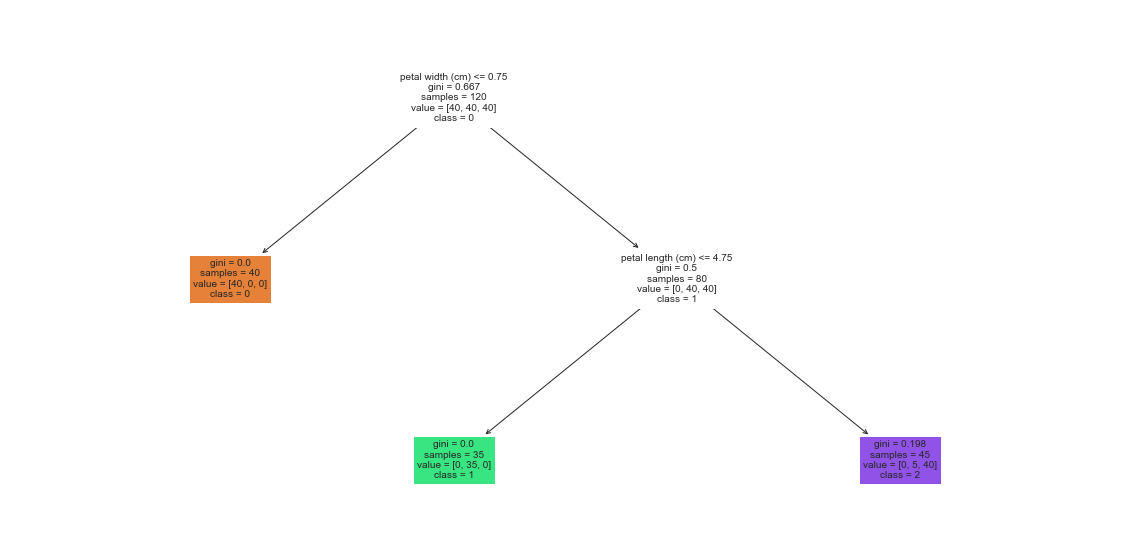

In [88]:
plt.figure(figsize=(20,10))
# X.columns =df.columns
tree.plot_tree(dt, feature_names=X.columns, class_names=['0', '1', '2'], filled=True, fontsize= 10)
plt.show()


In [89]:
dt_pred_train= dt.predict(X_train)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

print('DecisionTreeClassifier \n', classification_report(y_train, dt_pred_train))

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.88      0.93        40
           2       0.89      1.00      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [91]:
cm = confusion_matrix(y_train, dt_pred_train)
print('DecisionTreeClassifier \n', cm)

DecisionTreeClassifier 
 [[40  0  0]
 [ 0 35  5]
 [ 0  0 40]]


In [92]:
dt_pred_val= dt.predict(X_test)
print('DecisionTreeClassifier \n', classification_report(y_test, dt_pred_val))

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [93]:
print('training set score:', dt.score(X_train, y_train))
print('validation set score:', dt.score(X_test, y_test))

training set score: 0.9583333333333334
validation set score: 0.9333333333333333


# Hyperparameter tuning

In [94]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2,9),
    'min_samples_split': np.arange(2,9)
}

In [95]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

In [96]:
dt= DecisionTreeClassifier(random_state=1)
dt_grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score=True)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             return_train_score=True, scoring='accuracy')

In [97]:
print('best params:', dt_grid.best_params_)
print('best score:', dt_grid.best_score_)

best params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
best score: 0.9416666666666667


In [98]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=3, random_state=1)


In [99]:
dt_train_p = dt_best.predict(X_train)
dt_val_p = dt_best.predict(X_test)

In [100]:
print('training set: \n', classification_report(y_train, dt_train_p))

training set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.97      0.94        40
           2       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [101]:
print('test set: \n', classification_report(y_test, dt_val_p))

test set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# model inference

In [102]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
# create a list with values different from values in the DataFrame
X_new = pd.DataFrame({
    'sepal length': [5.1, 5.9, 6.9],
    'sepal width': [3.3, 3.0, 3.1],
    'petal length': [1.7, 4.2, 5.4],
    'petal width': [0.5, 1.5, 2.1]
})

X_cek = pd.DataFrame({
    'sepal length': [5.1, 5.9, 6.9, 5.0],
    'sepal width': [3.3, 3.0, 3.1, 6.0],
    'petal length': [1.7, 4.2, 5.4, 7.0],
    'petal width': [0.5, 1.5, 2.1, 4.0]
})

#check apakah nilai dalam dataframe X_new terdapat di dataframe X
print(X_new.isin(X))
print(X_new.isin(X_cek))


   sepal length  sepal width  petal length  petal width
0         False        False         False        False
1         False        False         False        False
2         False        False         False        False
   sepal length  sepal width  petal length  petal width
0          True         True          True         True
1          True         True          True         True
2          True         True          True         True


In [104]:
#check apakah new_data terdapat di dataframe X
print(pd.DataFrame(new_data).isin(X))

      0      1      2      3      4      5      6      7      8      9   \
0  False  False  False  False  False  False  False  False  False  False   

      10     11     12  
0  False  False  False  


In [105]:
new_data = [[5.1, 3.6, 1.4, 0.3]]
new_predictions = dt_best.predict(new_data)
if new_predictions == [1.]:
    print('versicolour')
elif new_predictions == [2.]:
    print('verginica')
else:
    print('setosa')

setosa


In [106]:
res_pred= dt_best.predict(X_new)
#create a dataframe with concat X_new and the results
res_pred_df= pd.DataFrame(res_pred, columns=['predictions'])

#concat X_new and the results
res_pred_df= pd.concat([X_new, res_pred_df], axis=1)
res_pred_df


,sepal length,sepal width,petal length,petal width,predictions
0,5.1,3.3,1.7,0.5,0
1,5.9,3.0,4.2,1.5,1
2,6.9,3.1,5.4,2.1,2


[referensi display all rows](https://www.geeksforgeeks.org/how-to-display-all-rows-from-dataframe-using-pandas/)

In [107]:
dt_test_p = dt_best.predict(X_test)
act_pred= pd.DataFrame({
        'Actual': y_test,
        'prediction': dt_test_p
        })
#transpose act_pred
act_pred_t= act_pred.T

pd. set_option('display.max_columns', 150)
act_pred_t

,107,9,98,11,43,0,148,111,121,76,16,53,112,62,113,15,102,71,57,127,74,66,37,8,147,106,5,12,56,54
Actual,2,0,1,0,0,0,2,2,2,1,0,1,2,1,2,0,2,1,1,2,1,1,0,0,2,2,0,0,1,1
prediction,2,0,1,0,0,0,2,2,2,1,0,1,2,1,2,0,2,1,1,2,1,1,0,0,2,1,0,0,1,1


# Boston

In [108]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [109]:
boston = datasets.load_boston()
print('Dataset structure= ', dir(boston))

Dataset structure=  ['DESCR', 'data', 'feature_names', 'filename', 'target']


In [110]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0
217,0.07013,0.0,13.89,0.0,0.550,6.642,85.1,3.4211,5.0,276.0,16.4,392.78,9.69,28.7
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6


In [111]:
#Lets create feature matrix X  and y labels
X = df.drop('target', axis=1)
y = df['target']
print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (506, 13)
y shape= (506,)


In [112]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (404, 13)
X_test dimension=  (102, 13)
y_train dimension=  (404,)
y_train dimension=  (102,)


In [113]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 1)
dtr.fit(X_train ,y_train)

DecisionTreeRegressor(random_state=1)

In [114]:
dtr.score(X_test, y_test)

0.6762626452032452

In [115]:
dtr.score(X_train, y_train)

1.0

In [116]:
from sklearn.metrics import mean_squared_error 
y_pred = dtr.predict(X_test)
mean_squared_error(y_test, y_pred)


31.99411764705883

In [117]:
y_pred_train = dtr.predict(X_train)
mean_squared_error(y_train, y_pred_train)

0.0

In [118]:
from sklearn.model_selection import GridSearchCV
param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtm = GridSearchCV(dtr, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [119]:
print("Best Score:{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters:\n{}".format(grid_cv_dtm.best_params_))

Best Score:0.3965495865472047
Best Hyperparameters:
{'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [120]:
best_dtm = grid_cv_dtm.best_estimator_
best_dtm.score(X_test, y_test)

0.8879207311386117

In [121]:
best_dtm.score(X_train, y_train)

0.8067196551629219

In [122]:
y_pred_test2 = best_dtm.predict(X_test)
print(mean_squared_error(y_test, y_pred_test2))

y_pred_train2 = best_dtm.predict(X_train)
print(mean_squared_error(y_train, y_pred_train2))

11.076501554783013
15.613453932448504


In [123]:
new_data = [[0.15, 25 ,5.13, 0.0, 0.453, 6.145, 29.2, 7.8148, 8.0, 284, 19.7, 390.6, 6.86]]

best_dtm.predict(new_data)

array([24.086])

In [124]:
predicted_price= pd.DataFrame(best_dtm.predict(X_test), columns=['Predicted Price'])
actual_price = pd.DataFrame(y_test, columns=['target'])
actual_price = actual_price.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actual_price,predicted_price],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
target,28.200000,23.900,16.600000,22.0000,20.800000,23.000000,27.900,14.500000,21.500000,22.600000,23.700000,31.200,19.300000,19.400000,19.400000,27.900000,13.900000,50.000000,24.100,14.600000,16.200000,15.600000,23.800000,25.000,23.500,8.300000,13.500000,17.500000,43.100000,11.500000,24.100,18.500000,50.000000,12.600,19.8000,24.500000,14.900000,36.200000,11.900000,19.100000,22.600,20.700,30.100000,13.300000,14.600000,8.400000,50.000000,12.700,25.000000,18.600000,29.800000,22.200000,28.700,23.800000,8.100000,22.200,6.300000,22.100000,17.500000,48.300000,16.700,26.600000,8.500,14.500000,23.700000,37.200000,41.700000,16.500,21.700000,22.700000,23.000,10.500000,21.900000,21.000000,20.400000,21.800000,50.000000,22.000,23.300000,37.300000,18.000000,19.200000,34.900000,13.400000,22.900,22.500,13.000,24.600,18.300000,18.100000,23.900000,50.000000,13.600000,22.900000,10.900,18.900000,22.400000,22.900000,44.800000,21.700000,10.200000,15.400
Predicted Price,24.703704,24.086,20.020833,20.9375,21.122222,21.122222,31.565,19.661364,18.078125,28.671429,28.671429,31.565,21.863636,21.863636,19.661364,21.122222,14.804348,45.096667,24.086,14.041667,19.661364,15.947619,24.703704,24.086,31.565,9.064516,14.041667,19.661364,45.096667,9.064516,24.086,20.020833,45.096667,13.245,20.9375,19.661364,15.947619,35.247826,14.804348,18.078125,24.086,24.086,24.703704,14.041667,14.804348,9.064516,45.096667,13.245,21.863636,19.661364,28.978261,21.863636,24.086,21.863636,14.041667,24.086,9.064516,24.703704,18.078125,45.096667,13.245,28.671429,13.245,14.804348,20.020833,35.247826,45.096667,24.086,21.863636,21.863636,24.086,9.064516,21.122222,19.661364,19.661364,21.122222,35.247826,24.086,28.671429,35.247826,18.078125,21.863636,35.247826,9.064516,24.086,24.086,13.245,24.086,19.661364,18.078125,28.978261,45.096667,18.078125,21.863636,13.245,21.863636,28.671429,24.703704,45.096667,19.661364,14.804348,13.245


# Kesimpulan